In [ ]:
# import libraries pandas, numpy, matplotlib
# your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# read data
# your code here
# write the path to the file in your google drive and read data
path = 'countries_co2.csv'
# use pandas method to read the data
df_source = pd.read_csv(path)

In [ ]:
# pick first few lines in your dataset
# your code here
df_source.head()

,country,year,co2,co2_growth_prct,co2_growth_abs,co2_per_capita,cumulative_co2,co2_per_gdp,coal_co2,cement_co2,oil_co2,cement_co2_per_capita,coal_co2_per_capita,oil_co2_per_capita,total_ghg,methane,nitrous_oxide,population,gdp,primary_energy_consumption
0,Afghanistan,1970,1.670,77.47,0.729,0.150,12.193,0.106,0.437,0.047,0.672,0.004,0.039,0.060,NaN,NaN,NaN,11173654.0,1.581223e+10,NaN
1,Afghanistan,1971,1.894,13.36,0.223,0.165,14.086,0.120,0.359,0.043,0.747,0.004,0.031,0.065,NaN,NaN,NaN,11475450.0,1.577051e+10,NaN
2,Afghanistan,1972,1.530,-19.18,-0.363,0.130,15.617,0.116,0.191,0.046,0.627,0.004,0.016,0.053,NaN,NaN,NaN,11791222.0,1.317055e+10,NaN
3,Afghanistan,1973,1.636,6.87,0.105,0.135,17.252,0.120,0.311,0.067,0.702,0.006,0.026,0.058,NaN,NaN,NaN,12108963.0,1.356863e+10,NaN
4,Afghanistan,1974,1.913,16.98,0.278,0.154,19.166,0.134,0.305,0.070,0.771,0.006,0.024,0.062,NaN,NaN,NaN,12412960.0,1.430911e+10,NaN


In [ ]:
# check data type of each column
# your code here
df_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9987 entries, 0 to 9986
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     9987 non-null   object 
 1   year                        9987 non-null   int64  
 2   co2                         9737 non-null   float64
 3   co2_growth_prct             9970 non-null   float64
 4   co2_growth_abs              9722 non-null   float64
 5   co2_per_capita              9648 non-null   float64
 6   cumulative_co2              9737 non-null   float64
 7   co2_per_gdp                 7614 non-null   float64
 8   coal_co2                    5838 non-null   float64
 9   cement_co2                  7016 non-null   float64
 10  oil_co2                     9715 non-null   float64
 11  cement_co2_per_capita       7001 non-null   float64
 12  coal_co2_per_capita         5824 non-null   float64
 13  oil_co2_per_capita          9626 

In [ ]:
# look at summary statistics and check for null values
# your code here
df_source.describe()

,year,co2,co2_growth_prct,co2_growth_abs,co2_per_capita,cumulative_co2,co2_per_gdp,coal_co2,cement_co2,oil_co2,cement_co2_per_capita,coal_co2_per_capita,oil_co2_per_capita,total_ghg,methane,nitrous_oxide,population,gdp,primary_energy_consumption
count,9987.000000,9737.000000,9970.000000,9722.000000,9648.000000,9737.000000,7614.000000,5838.000000,7016.000000,9715.000000,7001.000000,5824.000000,9626.000000,4885.000000,4887.000000,4887.000000,9.725000e+03,7.615000e+03,7557.000000
mean,1994.769200,127.871305,5.486608,2.341966,5.283941,4884.196800,0.387549,82.936985,5.344008,50.348528,0.148528,1.632742,2.824438,216.971263,41.142396,14.230364,2.907836e+07,3.579508e+11,668.231238
std,14.412387,566.036791,67.791998,26.770670,7.988082,23581.912459,0.399927,411.915402,33.626775,194.218916,0.172748,2.639633,5.084145,773.207665,119.673580,42.527436,1.150376e+08,1.259771e+12,2608.562182
min,1970.000000,0.004000,-94.480000,-439.504000,0.004000,0.004000,0.002000,0.000000,0.001000,0.004000,0.000000,0.000000,0.004000,-85.620000,0.000000,0.000000,1.606000e+03,1.044400e+08,0.013000
25%,1982.000000,1.038000,-1.680000,-0.062000,0.537750,21.839000,0.154000,0.304250,0.217750,0.799000,0.037000,0.033000,0.378000,9.020000,2.360000,0.640000,1.177133e+06,1.408643e+10,9.507000
50%,1995.000000,8.023000,2.290000,0.051000,2.535000,203.652000,0.269000,3.598500,0.731500,4.330000,0.102000,0.419500,1.359000,40.100000,9.170000,3.640000,5.397709e+06,4.525717e+10,64.754000
75%,2007.000000,54.214000,7.690000,1.050000,7.309250,1606.989000,0.462000,27.317500,2.801000,26.068500,0.206000,2.196000,3.579500,132.220000,31.005000,10.530000,1.773341e+07,2.011324e+11,332.833000
max,2019.000000,10174.681000,4730.640000,887.657000,117.309000,410238.263000,4.066000,7493.454000,826.876000,2607.134000,2.738000,27.927000,117.309000,11592.120000,1264.910000,556.980000,1.433784e+09,1.815162e+13,39360.925000


In [ ]:
df_source.sort_values('co2')
df_source

,country,year,co2,co2_growth_prct,co2_growth_abs,co2_per_capita,cumulative_co2,co2_per_gdp,coal_co2,cement_co2,oil_co2,cement_co2_per_capita,coal_co2_per_capita,oil_co2_per_capita,total_ghg,methane,nitrous_oxide,population,gdp,primary_energy_consumption
0,Afghanistan,1970,1.670,77.47,0.729,0.150,12.193,0.106,0.437,0.047,0.672,0.004,0.039,0.060,NaN,NaN,NaN,11173654.0,1.581223e+10,NaN
1,Afghanistan,1971,1.894,13.36,0.223,0.165,14.086,0.120,0.359,0.043,0.747,0.004,0.031,0.065,NaN,NaN,NaN,11475450.0,1.577051e+10,NaN
2,Afghanistan,1972,1.530,-19.18,-0.363,0.130,15.617,0.116,0.191,0.046,0.627,0.004,0.016,0.053,NaN,NaN,NaN,11791222.0,1.317055e+10,NaN
3,Afghanistan,1973,1.636,6.87,0.105,0.135,17.252,0.120,0.311,0.067,0.702,0.006,0.026,0.058,NaN,NaN,NaN,12108963.0,1.356863e+10,NaN
4,Afghanistan,1974,1.913,16.98,0.278,0.154,19.166,0.134,0.305,0.070,0.771,0.006,0.024,0.062,NaN,NaN,NaN,12412960.0,1.430911e+10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,Zimbabwe,2015,12.170,1.65,0.198,0.881,726.480,0.579,8.035,0.504,3.631,0.036,0.582,0.263,67.49,11.87,6.68,13814642.0,2.102746e+10,55.642
9983,Zimbabwe,2016,10.815,-11.14,-1.356,0.771,737.295,0.516,7.061,0.581,3.173,0.041,0.503,0.226,65.98,11.92,6.55,14030338.0,2.096179e+10,47.500
9984,Zimbabwe,2017,10.247,-5.25,-0.568,0.720,747.542,0.467,6.383,0.581,3.283,0.041,0.448,0.231,NaN,NaN,NaN,14236599.0,2.194784e+10,NaN
9985,Zimbabwe,2018,11.341,10.67,1.094,0.785,758.882,0.499,7.369,0.581,3.390,0.040,0.510,0.235,NaN,NaN,NaN,14438812.0,2.271535e+10,NaN


In [ ]:
highest_co2_growth = df_source.iloc[df_source.co2_per_capita.idxmax()]
highest_co2_growth

country                       Curacao
year                             1976
co2                            17.625
co2_growth_prct                113.62
co2_growth_abs                  9.374
co2_per_capita                117.309
cumulative_co2                326.994
co2_per_gdp                       NaN
coal_co2                          NaN
cement_co2                        NaN
oil_co2                        17.625
cement_co2_per_capita             NaN
coal_co2_per_capita               NaN
oil_co2_per_capita            117.309
total_ghg                         NaN
methane                           NaN
nitrous_oxide                     NaN
population                     150240
gdp                               NaN
primary_energy_consumption        NaN
Name: 2214, dtype: object

In [ ]:
lowest_co2_growth = df_source.iloc[df_source.co2_per_capita.idxmin()]
lowest_co2_growth

country                          Cambodia
year                                 1979
co2                                 0.029
co2_growth_prct                    -42.68
co2_growth_abs                     -0.022
co2_per_capita                      0.004
cumulative_co2                      7.526
co2_per_gdp                         0.003
coal_co2                              NaN
cement_co2                            NaN
oil_co2                             0.029
cement_co2_per_capita                 NaN
coal_co2_per_capita                   NaN
oil_co2_per_capita                  0.004
total_ghg                             NaN
methane                               NaN
nitrous_oxide                         NaN
population                    6.77039e+06
gdp                           8.92207e+09
primary_energy_consumption            NaN
Name: 1467, dtype: object

In [ ]:
# check null values
# your code here
df_source
df_source.isnull()

,country,year,co2,co2_growth_prct,co2_growth_abs,co2_per_capita,cumulative_co2,co2_per_gdp,coal_co2,cement_co2,oil_co2,cement_co2_per_capita,coal_co2_per_capita,oil_co2_per_capita,total_ghg,methane,nitrous_oxide,population,gdp,primary_energy_consumption
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9983,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9984,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,True
9985,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,True


In [ ]:
average_co2_per_capita_cement = []
average_co2_per_capita_oil = []
average_co2_per_capita_coal = []

for i in range(1999, 2018):
  df_source1 = df_source.loc[(df_source.year > i) & (df_source.year < i+2)]
  avg_co2_per_capita_cement = df_source1['cement_co2_per_capita'].mean()
  avg_co2_per_capita_oil = df_source1['oil_co2_per_capita'].mean()
  avg_co2_per_capita_coal = df_source1['coal_co2_per_capita'].mean()
  average_co2_per_capita_cement.append(avg_co2_per_capita_cement)
  average_co2_per_capita_oil.append(avg_co2_per_capita_oil)
  average_co2_per_capita_coal.append(avg_co2_per_capita_coal)

In [ ]:
print('average_co2_per_capita_cement:', average_co2_per_capita_cement)
print('average_co2_per_capita_oil:', average_co2_per_capita_oil)
print('average_co2_per_capita_coal:', average_co2_per_capita_coal)

average_co2_per_capita_cement: [0.1443191489361702, 0.14299285714285712, 0.14615, 0.1479007092198583, 0.15557142857142855, 0.15602836879432622, 0.1622695035460992, 0.1689788732394367, 0.1711760563380281, 0.1517692307692308, 0.14995104895104894, 0.15250000000000002, 0.15406206896551722, 0.15593197278911566, 0.1643333333333333, 0.16060135135135126, 0.16014189189189187, 0.1604459459459459, 0.15924324324324324]
average_co2_per_capita_oil: [2.7880765306122455, 2.8342908163265306, 2.7649441624365494, 2.823553299492387, 2.8385939086294423, 2.8393502538071047, 2.8581878172588833, 2.87656345177665, 2.859314720812189, 2.7588578680203053, 2.6680609137055824, 2.568025380710659, 2.6521624365482226, 2.6105989847715727, 2.614116751269037, 2.613629441624365, 2.510878172588833, 2.4989746192893403, 2.513532994923858]
average_co2_per_capita_coal: [1.4746875000000002, 1.4668333333333339, 1.4364615384615382, 1.5315086206896558, 1.5713362831858406, 1.5161315789473686, 1.548482758620689, 1.5727500000000008, 

In [ ]:
rounded_average_co2_per_capita_cement = [ round(elem, 2) for elem in average_co2_per_capita_cement ]
rounded_average_co2_per_capita_oil = [ round(elem, 2) for elem in average_co2_per_capita_oil ]
rounded_average_co2_per_capita_coal = [ round(elem, 2) for elem in average_co2_per_capita_coal ]

In [ ]:
print(rounded_average_co2_per_capita_coal)

[1.47, 1.47, 1.44, 1.53, 1.57, 1.52, 1.55, 1.57, 1.52, 1.4, 1.5, 1.5, 1.54, 1.54, 1.49, 1.41, 1.43, 1.46, 1.62]


Text(0.5, 1.0, 'Proportion of Co2 Emissions contributed by Cement, Oil and Coal')

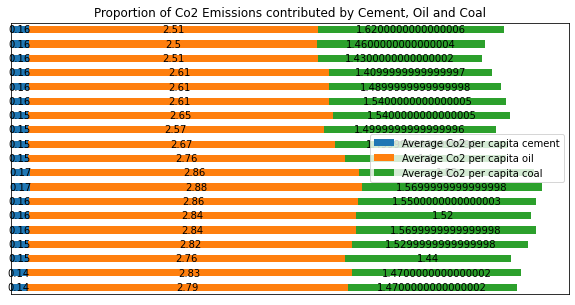

In [ ]:
df = pd.DataFrame({
    'Average Co2 per capita cement': rounded_average_co2_per_capita_cement,
    'Average Co2 per capita oil': rounded_average_co2_per_capita_oil,
    'Average Co2 per capita coal': rounded_average_co2_per_capita_coal,
})

# Save the chart that's drawn
ax = df.plot(stacked=True, kind='barh', figsize=(10, 5))

# .patches is everything inside of the chart, lines and
# rectangles and circles and stuff. In this case we only
# have rectangles!
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The width of the bar is also not pixels, it's the
    # number of animals. So we can use it as the label!
    label_text = width
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center', va='center')

plt.xticks([])
plt.yticks([])
plt.title('Proportion of Co2 Emissions contributed by Cement, Oil and Coal')

Question Answered: What are the key drivers of Co2 emissions?

Insight: Among the natural resources of cement, oil and coal, oil contributes to the highest Co2 per capita followed by coal and then cement. Hence, the oil is a key driver of climate change and its use must be limited.

In [ ]:
all_countries = df_source['country'].unique()

In [ ]:
rate_of_increase_of_co2_emissions = []
df_source_restricted = df_source.loc[(df_source.year > 1999) & (df_source.year < 2021)]
for i in all_countries:
  df_source2 = df_source_restricted.loc[df_source.country == i]
  x = df_source2['year']
  y = df_source2['co2']
  slope, intercept = np.polyfit(x, y, 1)
  plt.scatter(x, y)
  plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
  rate_of_increase_of_co2_emissions.append(slope)
  plt.close()

In [ ]:
rate_of_increase_of_co2_emissions = [ round(elem, 2) for elem in rate_of_increase_of_co2_emissions ]

In [ ]:
index_of_null_values = []
counter = 0
for i in rate_of_increase_of_co2_emissions:
  counter = counter + 1
  if np.isnan(i):
    index_of_null_values.append(counter-1)

In [ ]:
print(index_of_null_values)

[37, 101, 145, 152, 157]


In [ ]:
new_rate_of_increase_of_co2_emissions = np.delete(rate_of_increase_of_co2_emissions, index_of_null_values)
new_all_countries = np.delete(all_countries, index_of_null_values)

In [ ]:
df_new = pd.DataFrame({'Country':new_all_countries, 'Rate of increase of co2 emissions':new_rate_of_increase_of_co2_emissions})

In [ ]:
df_new.head()

,Country,Rate of increase of co2 emissions
0,Afghanistan,0.57
1,Albania,0.11
2,Algeria,4.56
3,Andorra,-0.01
4,Angola,1.69


In [ ]:
test1 = df_new.sort_values('Rate of increase of co2 emissions', ascending=False)
test2 = df_new.sort_values('Rate of increase of co2 emissions', ascending=True)

In [ ]:
print("Top 20 countries with highest rate of increase of co2 emissions")
test1.head(20)

Top 20 countries with highest rate of increase of co2 emissions


,Country,Rate of increase of co2 emissions
36,China,396.75
80,India,96.13
82,International transport,26.31
83,Iran,20.29
155,Saudi Arabia,17.76
81,Indonesia,16.54
184,Turkey,11.40
166,South Korea,11.10
25,Brazil,10.99
151,Russia,9.67


Question Answered: Which countries increase/decrease Co2 emissions at the fastest rate?

Insight: China and India are seeing the largest rise in the rate of Co2 emissions, potentially as a consequence of their large populations. These 2 countries must recognise climate change as a critical issue and work towards its eradication to prevent catastrophe.

In [ ]:
print("Top 20 countries with highest rate of decrease of co2 emissions")
test2.head(20)

Top 20 countries with highest rate of decrease of co2 emissions


,Country,Rate of increase of co2 emissions
190,United States,-46.84
189,United Kingdom,-11.99
87,Italy,-9.46
66,Germany,-8.85
89,Japan,-5.89
62,France,-5.87
168,Spain,-5.30
187,Ukraine,-4.76
134,North Korea,-2.93
68,Greece,-2.47


Question Answered: Which countries increase/decrease Co2 emissions at the fastest rate?

Insight: The USA and UK could serve as good examples to the rest of the world to understand the best solutions to curb climate change as a result of their successful efforts in decreasing Co2 emissions over the past few years.

####Question: What is the relationship between CO2 and the population of a country?

The relationship between the population and the CO2 emissions of 9 random countries


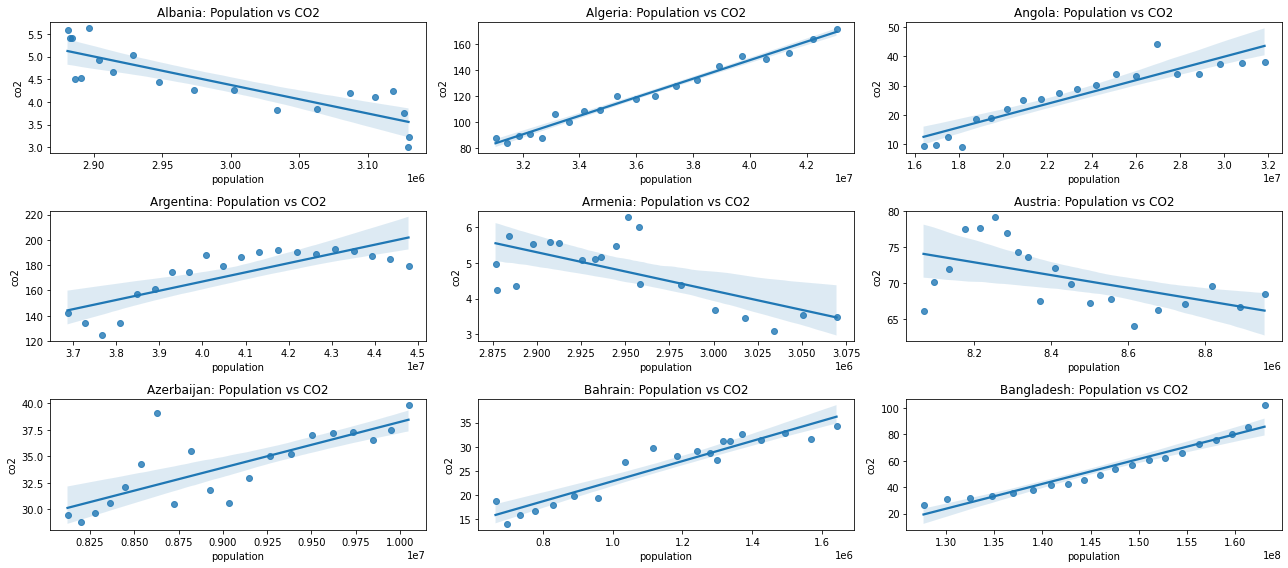

In [ ]:
print("The relationship between the population and the CO2 emissions of 9 random countries")

fig=plt.figure(figsize = (18,8))
axes=[]

for i in range(1,10):
  df_name = df.loc[lst[i].capitalize()]
  axes.append( fig.add_subplot(3, 3, i))
  sns.regplot(x=df_name["population"],y=df_name["co2"],ax=axes[-1]).set_title(f"{lst[i].capitalize()}: Population vs CO2")

fig.tight_layout()    


The relationship between the population and the CO2 emissions of the top 5 countries with the highest CO2 emissions


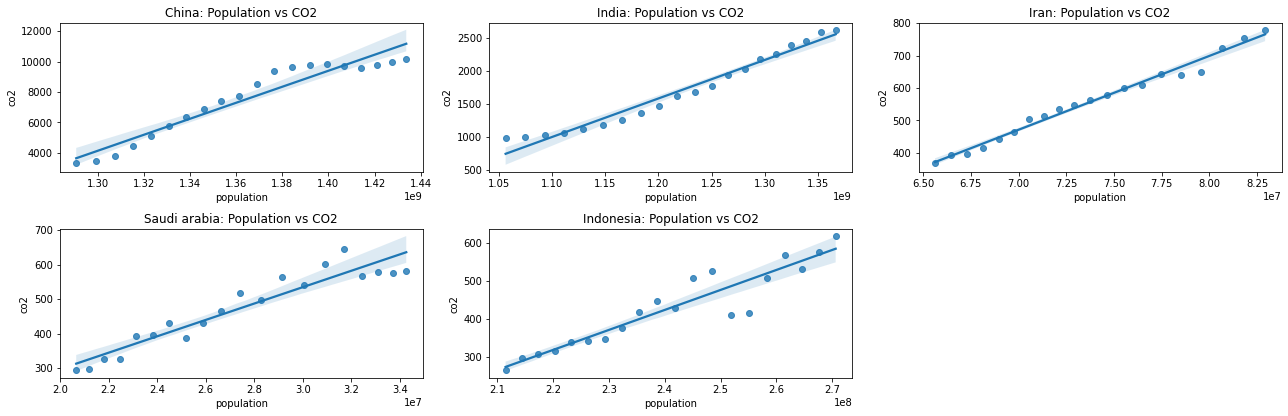

In [ ]:
print("The relationship between the population and the CO2 emissions of the top 5 countries with the highest CO2 emissions")

fig=plt.figure(figsize = (18,100))
axes=[]
for i in range(len(top_countries)):
  df_name = df.loc[top_countries[i].capitalize()]
  # df_name = df.loc[top_countries[i].capitalize()]
  axes.append( fig.add_subplot(35, 3, i+1))
  sns.regplot(x=df_name["population"],y=df_name["co2"],ax=axes[-1]).set_title(f"{top_countries[i].capitalize()}: Population vs CO2")

fig.tight_layout()    


The relationship between the Population and the CO2 emissions of the top 5 countries with the least increase CO2 emissions


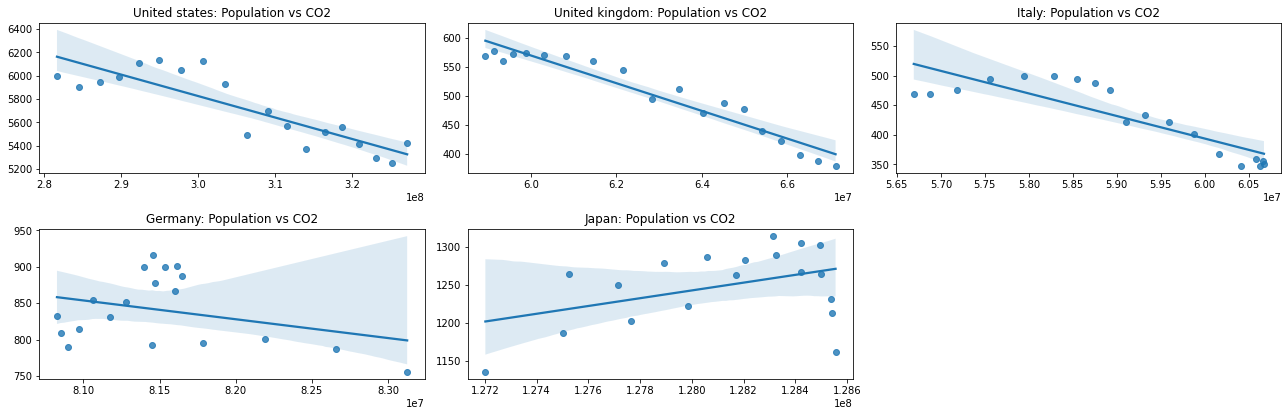

In [ ]:
print("The relationship between the Population and the CO2 emissions of the top 5 countries with the least increase CO2 emissions")

fig=plt.figure(figsize = (18,100))
axes=[]

for i in range(len(bottom_countries)):
  x_lst = list(df.loc[bottom_countries[i]]['population'])
  x_lst.pop()
  y_lst = list(df.loc[bottom_countries[i]]['co2'])
  y_lst.pop()
  df_name = df.loc[bottom_countries[i].capitalize()]
  axes.append( fig.add_subplot(35, 3, i+1))
  sns.regplot(x=x_lst,y=y_lst,ax=axes[-1]).set_title(f"{bottom_countries[i].capitalize()}: Population vs CO2")

fig.tight_layout()    


***Insights: It can be seen that for countries with high CO2 emissions, such as India, the amount of CO2 emissions increases as the population increases. However, in countries where the CO2 emissions are slowly declining, such as Germany, the CO2 emissions decreases as the population increases with the exception of Japan***

####Question: What is the relationship between CO2 and the GDP of a country?

The relationship between the GDP and the CO2 emissions of 9 random countries


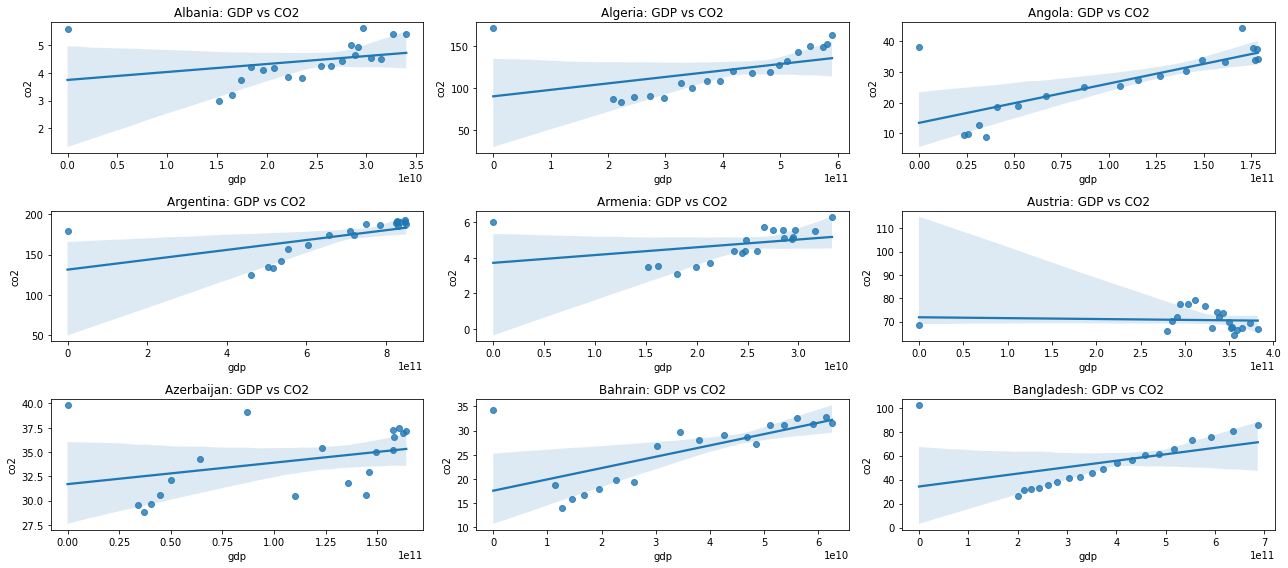

In [ ]:
print("The relationship between the GDP and the CO2 emissions of 9 random countries")

fig=plt.figure(figsize = (18,8))
axes=[]

for i in range(1,10):
  df_name = df.loc[lst[i].capitalize()]
  axes.append( fig.add_subplot(3, 3, i))
  sns.regplot(x=df_name["gdp"],y=df_name["co2"],ax=axes[-1]).set_title(f"{lst[i].capitalize()}: GDP vs CO2")

fig.tight_layout()    


The relationship between the GDP and the CO2 emissions of the top 5 countries with the highest CO2 emissions


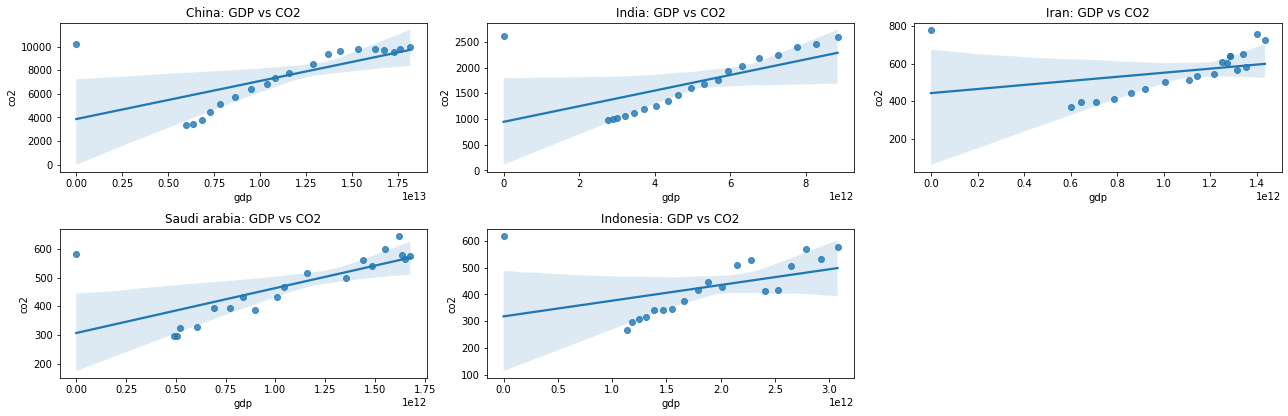

In [ ]:
print("The relationship between the GDP and the CO2 emissions of the top 5 countries with the highest CO2 emissions")

fig=plt.figure(figsize = (18,100))
axes=[]
for i in range(len(top_countries)):
  df_name = df.loc[top_countries[i].capitalize()]
  # df_name = df.loc[top_countries[i].capitalize()]
  axes.append( fig.add_subplot(35, 3, i+1))
  sns.regplot(x=df_name["gdp"],y=df_name["co2"],ax=axes[-1]).set_title(f"{top_countries[i].capitalize()}: GDP vs CO2")

fig.tight_layout()    


The relationship between the GDP and the CO2 emissions of the top 5 countries with the least increase CO2 emissions


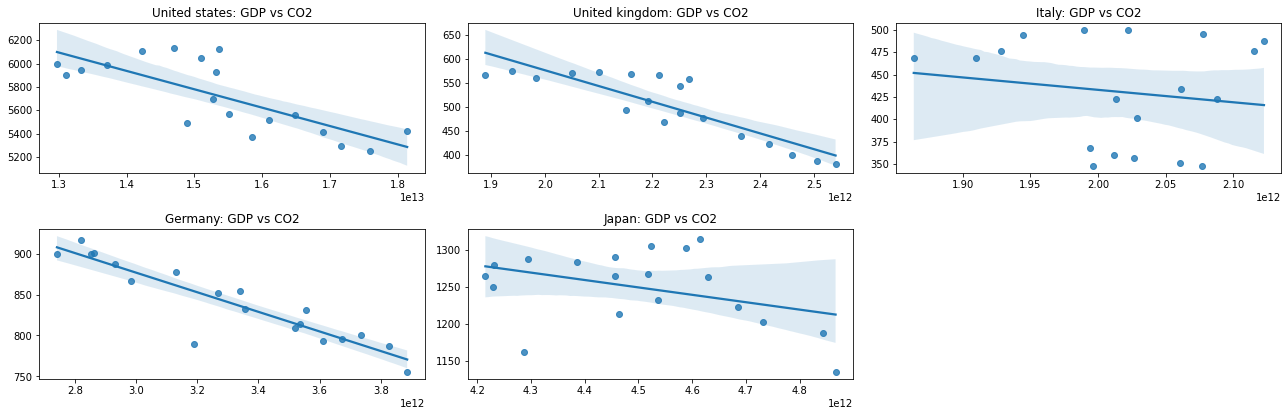

In [ ]:
print("The relationship between the GDP and the CO2 emissions of the top 5 countries with the least increase CO2 emissions")

fig=plt.figure(figsize = (18,100))
axes=[]

for i in range(len(bottom_countries)):
  x_lst = list(df.loc[bottom_countries[i]]['gdp'])
  x_lst.pop()
  y_lst = list(df.loc[bottom_countries[i]]['co2'])
  y_lst.pop()
  df_name = df.loc[bottom_countries[i].capitalize()]
  axes.append( fig.add_subplot(35, 3, i+1))
  sns.regplot(x=x_lst,y=y_lst,ax=axes[-1]).set_title(f"{bottom_countries[i].capitalize()}: GDP vs CO2")

fig.tight_layout()    


***Insights: It can be seen that for countries with high CO2 emissions, such as India, the amount of CO2 emissions increases as the GDP increases. However, in countries where the CO2 emissions are slowly declining, such as Germany, the CO2 emissions decrease as the GDP increases***